In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
import torch
import torch.nn as nn
import math

C:\Users\82104\anaconda3\envs\py38-torch113\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 3.2 이진 영상
* 연결 요소   
연결 요소를 활용하여 labeling이 가능

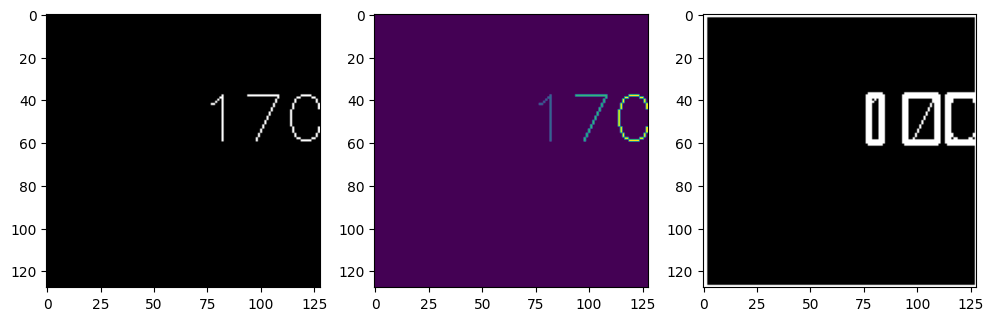

In [2]:
back = np.zeros((128, 128, 1), np.uint8)
number = random.randint(1, 999)
x, y = random.randint(40, 80), random.randint(40, 80)

number_img = cv2.putText(back, str(number), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, 1, 1)
cnt, labels, stats, centroids = cv2.connectedComponentsWithStats(number_img)

plt.figure(figsize=(12, 12))
plt.subplot(1, 3, 1)
plt.imshow(number_img, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(labels)

for i in range(cnt):
    left_top = stats[i, :2]
    right_down = left_top + stats[i, 2:-1]
    box_img = cv2.rectangle(number_img, left_top, right_down, 1, 2)
plt.subplot(1, 3, 3)
plt.imshow(box_img, cmap="gray")

## 3.4 영역 연산
* 다양한 필터   
convolution 연산을 pytorch로 수행 가능

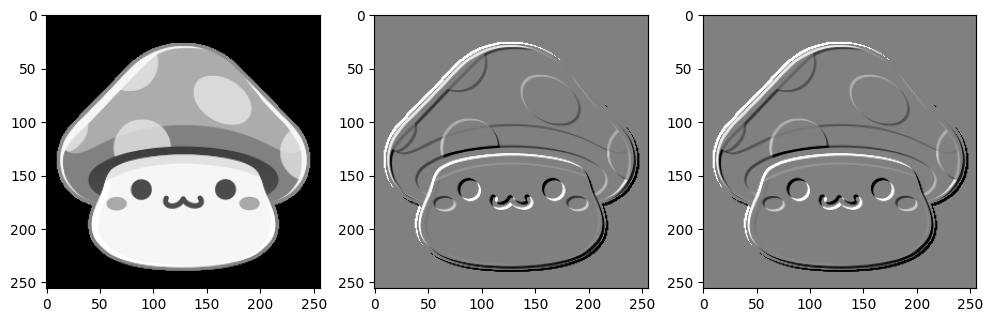

In [3]:
embossing_filter = np.array([[-1, 0, 0],
                            [0, 0, 0],
                            [0, 0, 1]])   # [1, 1, 3, 3]
embossing_conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=1)
embossing_conv.weight = nn.Parameter(torch.from_numpy(embossing_filter[np.newaxis, np.newaxis, ...])
                                     .float()) ## weight 변경

img = cv2.imread("./imgs/maplestory-256x256.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 12))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap="gray")

# cv2 embossing
cv2_embossing = np.clip(cv2.filter2D(np.int16(img), -1, embossing_filter) + 128, 0, 255)
plt.subplot(1, 3, 2)
plt.imshow(cv2_embossing, cmap="gray")

# torch embossing
conv_embossing = embossing_conv(torch.from_numpy(img[np.newaxis, np.newaxis, ...]).float())
conv_embossing = np.clip(conv_embossing.squeeze().detach().numpy() + 128, 0, 255)

plt.subplot(1, 3, 3)
plt.imshow(conv_embossing, cmap="gray")

## 3.5 기하 연산
* 영상 보간   
nearest neighbor의 활용

In [4]:
mask = cv2.imread("./imgs/seg_mask.png")
print("class :", np.unique(mask))

bi_resized_mask = cv2.resize(mask, dsize=(0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)
print("bilinear class :", np.unique(bi_resized_mask))

nearest_mask = cv2.resize(mask, dsize=(0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_NEAREST)
print("nearest class :", np.unique(nearest_mask))

class : [  0  34 119 158 255]
bilinear class : [  0   9  17  26  30  34  40  57  60  64  65  79  89  96 103 109 119 120
 127 128 129 139 143 145 148 151 158 167 182 207]
nearest class : [  0  34 119 158 255]


## 연습문제

In [6]:
# 문제 1
a1 = 512 * 512 * 3 * 1
print(a1)
a2 = 30 * 30 * 256 * 256 * 3
print(a2)
a3 = 256 * 256 * 128
print(a3)
a4 = 512 * 512 * 8
print(a4)
a5 = 20000 * 4 * 3
print(a5)

786432
176947200
8388608
2097152
240000


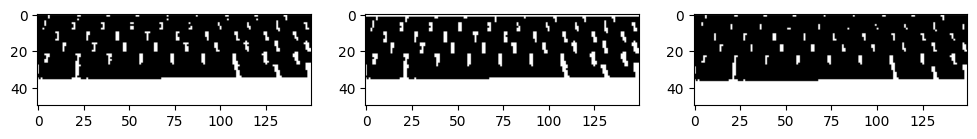

In [7]:
# 문제 2
img = cv2.imread("./imgs/laptop.jpg")
t, bin_img = cv2.threshold(img[..., 1], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(12, 12))
plt.subplot(1, 3, 1)
plt.imshow(bin_img[300:350, 250:400], cmap="gray")

se = np.uint8([[1],[1]])

bin_dilation = cv2.dilate(bin_img[300:350, 250:400], se, iterations=1)
plt.subplot(1, 3, 2)
plt.imshow(bin_dilation, cmap="gray")

bin_erosion = cv2.erode(bin_img[300:350, 250:400], se, iterations=1)
plt.subplot(1, 3, 3)
plt.imshow(bin_erosion, cmap="gray")

(array([2., 2., 1., 8., 8., 2., 2.]),
 array([0., 1., 2., 3., 4., 5., 6., 7.]),
 <BarContainer object of 7 artists>)

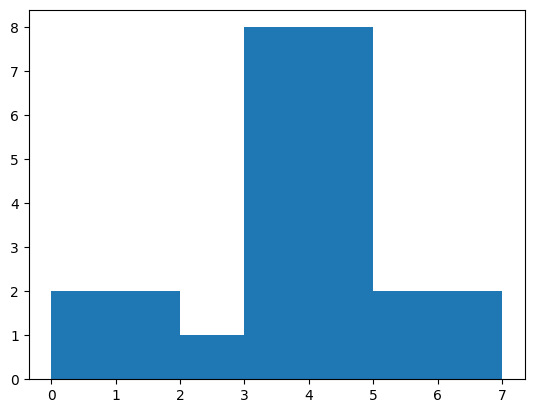

In [8]:
# 문제 3
img = np.array([[0, 0, 1, 1, 3],
               [2, 3, 3, 3, 3],
               [3, 3, 4, 4, 4],
               [4, 3, 4, 5, 7],
               [4, 4, 4, 5, 7]])

plt.hist(img.flatten(), bins=7)

In [9]:
np.unique(bin_img)

array([  0, 255], dtype=uint8)

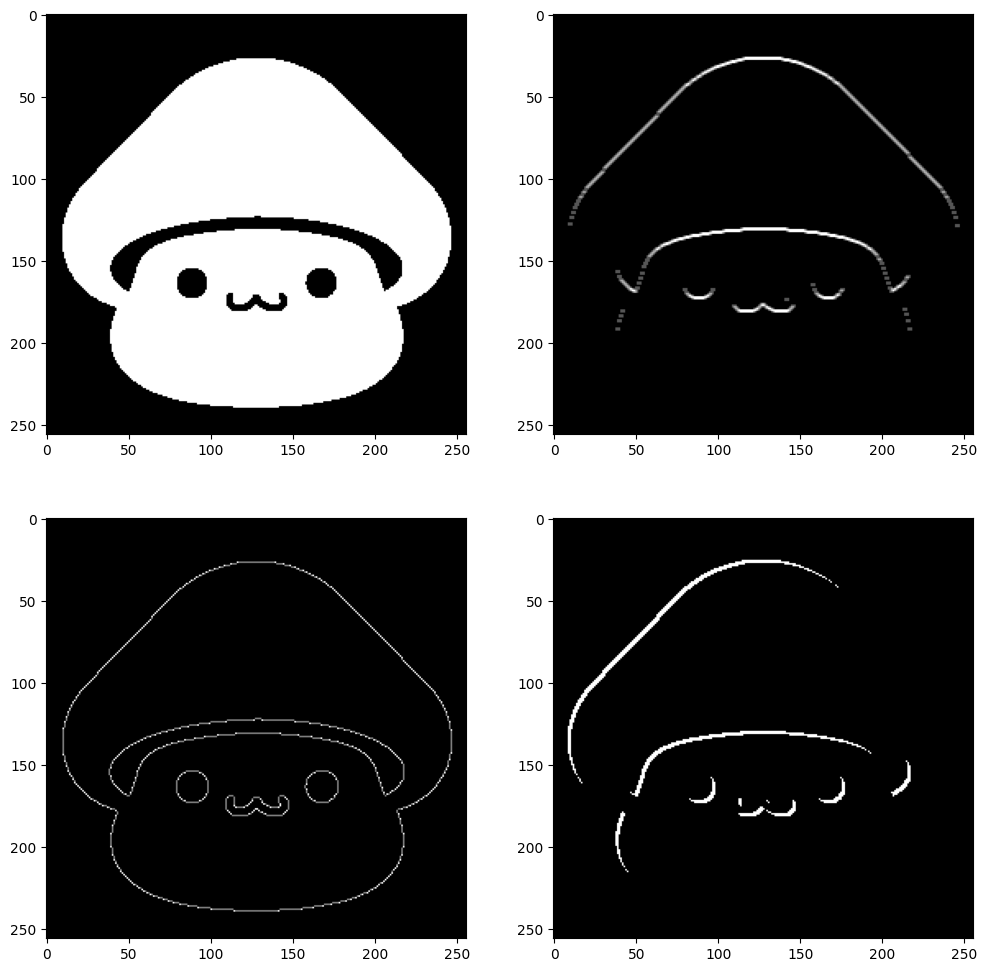

In [10]:
# 문제 4
img = cv2.imread("./imgs/maplestory-256x256.png", cv2.IMREAD_GRAYSCALE)
t, bin_img = cv2.threshold(img, 0, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.imshow(bin_img, cmap="gray")

filter1 = np.float32([[-1, -1, -1],
                   [0, 0, 0],
                   [1, 1, 1]])
filter2 = np.float32([[0, -1, 0],
                   [-1, 4, -1],
                   [0, -1, 0]])
filter3 = np.float32([[-1, 0, 0],
                   [0, 0, 0],
                   [0, 0, 1]])

filter1_img = np.uint8(np.clip(cv2.filter2D(bin_img, -1, filter1), 0, 255))   # 수평 에지 검출
plt.subplot(2, 2, 2)
plt.imshow(filter1_img, cmap="gray")

filter2_img = np.uint8(np.clip(cv2.filter2D(bin_img, -1, filter2), 0, 255))   # 샤프닝
plt.subplot(2, 2, 3)
plt.imshow(filter2_img, cmap="gray")

filter3_img = np.uint8(np.clip(cv2.filter2D(bin_img, -1, filter3), 0, 255))  # 엠보싱
plt.subplot(2, 2, 4)
plt.imshow(filter3_img, cmap="gray")

In [11]:
# 문제 5
transform_mat = np.array([[1, 0 , 2],
                         [0, 1, -1],
                         [0, 0, 1]])
origin_points = np.array([[2, 1, 2],
                         [3, 4, 4],
                        [1, 1, 1]])

transformed = transform_mat @ origin_points
transformed

array([[4, 3, 4],
       [2, 3, 3],
       [1, 1, 1]])

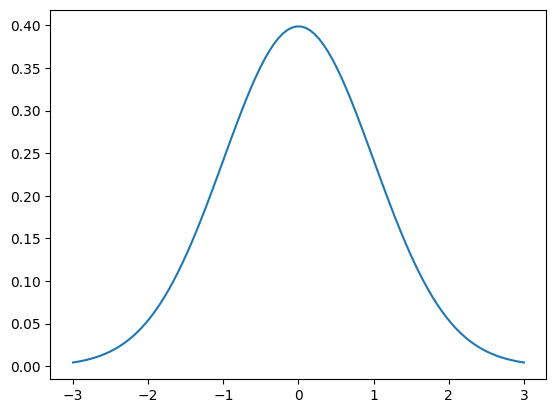

In [12]:
# 문제 6
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

def gaussian1d(x, mean, sigma):
    return (1 / np.sqrt(2*np.pi * sigma**2)) * np.exp(-(x-mean)**2 / (2*sigma**2))

plt.plot(x, gaussian1d(x, mu, sigma))

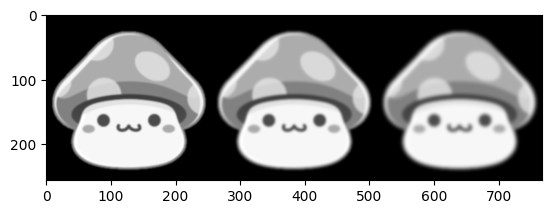

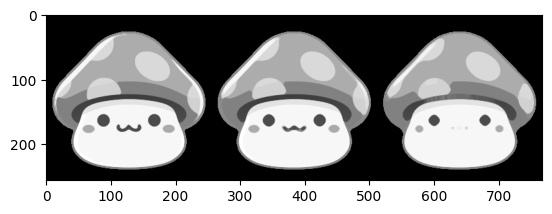

In [13]:
# 문제 7

img = cv2.imread("./imgs/maplestory-256x256.png", cv2.IMREAD_GRAYSCALE)
g_smooth = np.hstack([cv2.GaussianBlur(img, (5, 5), 0.0), cv2.GaussianBlur(img, (9, 9), 0.0),
                      cv2.GaussianBlur(img, (15, 15), 0.0)])
m_smooth = np.hstack([cv2.medianBlur(img, 5), cv2.medianBlur(img, 9),
                      cv2.medianBlur(img, 15)])

plt.imshow(g_smooth, cmap="gray")   # 라인 유지
plt.show()
plt.imshow(m_smooth, cmap="gray")   # 무작위 잡음 제거
plt.show()

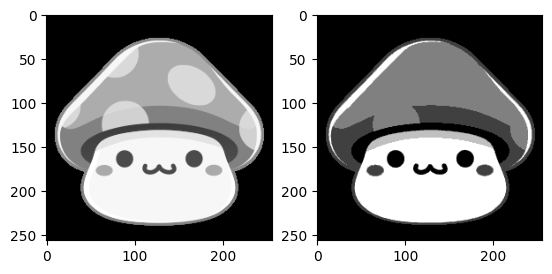

In [14]:
# 문제 8
def equal(img):
    unique, counts = np.unique(img.flatten(), return_counts=True)
    norm_counts = counts / np.sum(counts)
    cum_counts = np.cumsum(norm_counts)
    equal_value = np.round(cum_counts * 7)
    return_img = np.zeros_like(img, dtype=np.float32)
    for v, tv in zip(unique, equal_value):
        return_img += np.where(img == v, tv, 0)
    return return_img
    
img = cv2.imread("./imgs/maplestory-256x256.png", cv2.IMREAD_GRAYSCALE)
equal_img = equal(img)
# plt.hist(equal_img.flatten())
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(equal_img, cmap="gray")

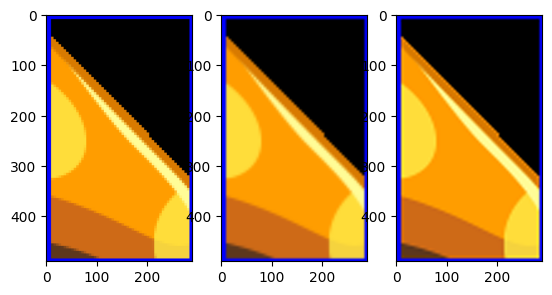

In [15]:
# 문제 9
img = cv2.imread("./imgs/maplestory-256x256.png")

def select(event, x, y, flags, param):
    global ix, iy
    global patch
    if event == cv2.EVENT_LBUTTONDOWN:
        ix, iy = x, y
    elif event == cv2.EVENT_LBUTTONUP:
        cv2.rectangle(img, (ix, iy), (x, y), (255, 0, 0), 2)
        patch = img[np.minimum(iy, y):np.maximum(iy, y), np.minimum(ix, x):np.maximum(ix, x)]
    cv2.imshow("img", img)
    

cv2.namedWindow("img")
cv2.imshow("img", img)
cv2.setMouseCallback("img", select)

while True:
    if cv2.waitKey(1) == ord('q'):
        cv2.destroyAllWindows()
        break
        
patch1 = cv2.resize(patch, dsize=(0, 0), fx=5, fy=5, interpolation=cv2.INTER_NEAREST)
patch2 = cv2.resize(patch, dsize=(0, 0), fx=5, fy=5, interpolation=cv2.INTER_LINEAR)
patch3 = cv2.resize(patch, dsize=(0, 0), fx=5, fy=5, interpolation=cv2.INTER_CUBIC)

plt.subplot(1, 3, 1)
plt.imshow(patch1[..., ::-1])
plt.subplot(1, 3, 2)
plt.imshow(patch2[..., ::-1])
plt.subplot(1, 3, 3)
plt.imshow(patch3[..., ::-1])

In [16]:
# 문제 10
## 반복문과 행렬 연산 차이